In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df_styledata = pd.read_csv("./data/styleData.csv", sep=',', encoding='ISO-8859-1')
df_resolution = pd.read_csv("./data/recipeData.csv", sep=',', encoding='ISO-8859-1')

In [3]:
df_resolution.head(3)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN


In [4]:
df_resolution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73860 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [5]:
len(df_resolution)

73861

In [6]:
df_resolution.isnull().sum()/len(df_resolution)*100

BeerID            0.000000
Name              0.001354
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.839550
PrimingAmount    93.536508
UserId           68.358132
dtype: float64

We can delete variables that have a large number of missing values

In [7]:
df_resolution.drop(["PrimingAmount", "PrimingMethod", "UserId"], axis=1, inplace=True)

In [8]:
df_resolution.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00


In [9]:
df_resolution.loc[df_resolution.loc[:]["Name"].isna()]

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
28051,28052,NaN,/homebrew/recipe/view/396948/n-a,Blonde Ale,30,18.93,1.002,1.001,0.22,0.0,0.53,22.71,60,1.002,70.0,1.5,Specific Gravity,All Grain,0.5,21.11


In [10]:
df_resolution.drop(28051, axis=0, inplace=True)

In [11]:
df_resolution.isna().sum()

BeerID               0
Name                 0
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
dtype: int64

We want the classes that has more than 1000 samples

In [12]:
df_resolution["StyleID"].value_counts()

7      11940
10      7581
134     2617
9       2277
4       2038
30      1752
86      1478
12      1268
92      1204
6       1152
175     1072
39      1044
169      988
114      961
132      929
162      919
170      919
129      897
94       869
56       864
45       830
11       787
65       784
87       675
68       659
14       654
148      638
24       625
111      596
15       571
26       563
21       538
22       530
155      514
75       502
20       496
58       484
159      481
81       466
150      442
37       438
67       432
145      430
25       422
27       395
167      395
28       391
34       390
115      364
72       360
144      356
23       354
19       344
31       344
5        341
109      340
102      333
85       331
157      323
151      318
90       309
116      300
152      287
113      284
105      276
118      271
35       271
93       263
108      260
63       253
53       240
50       237
54       237
160      230
13       227
66       222
147      221

In [13]:
df_resolution = df_resolution.loc[df_resolution["StyleID"].isin([7,10,134,9,4,30,86,12,92,6,175,39])]

In [14]:
df_resolution.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN
9,10,Mango Habanero IPA,/homebrew/recipe/view/61082/mango-habanero-ipa,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11


In [15]:
df_resolution.drop(["BeerID", "Name", "URL", "Style"], axis = 1, inplace=True)

In [16]:
df_resolution.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11


In [17]:
df_resolution.columns

Index(['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize',
       'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'SugarScale',
       'BrewMethod', 'PitchRate', 'PrimaryTemp'],
      dtype='object')

In [18]:
df_resolution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35423 entries, 2 to 73860
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StyleID        35423 non-null  int64  
 1   Size(L)        35423 non-null  float64
 2   OG             35423 non-null  float64
 3   FG             35423 non-null  float64
 4   ABV            35423 non-null  float64
 5   IBU            35423 non-null  float64
 6   Color          35423 non-null  float64
 7   BoilSize       35423 non-null  float64
 8   BoilTime       35423 non-null  int64  
 9   BoilGravity    34123 non-null  float64
 10  Efficiency     35423 non-null  float64
 11  MashThickness  20928 non-null  float64
 12  SugarScale     35423 non-null  object 
 13  BrewMethod     35423 non-null  object 
 14  PitchRate      15874 non-null  float64
 15  PrimaryTemp    24158 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.6+ MB


In [19]:
df_resolution.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
dtype: object

In [20]:
df_resolution.SugarScale.value_counts()

Specific Gravity    34604
Plato                 819
Name: SugarScale, dtype: int64

In [21]:
df_resolution.BrewMethod.value_counts()

All Grain       23593
BIAB             5779
extract          4377
Partial Mash     1674
Name: BrewMethod, dtype: int64

We can substitute the SugarScale by 0 and 1 since is just 2 values, and we can apply the one hot enconding to the BrewMethod

In [22]:
df_resolution.SugarScale = df_resolution.SugarScale.replace('Specific Gravity', 0)
df_resolution.SugarScale = df_resolution.SugarScale.replace('Plato', 1)

In [23]:
bremethod_encode = pd.get_dummies(df_resolution['BrewMethod'])

In [24]:
df_resolution.drop("BrewMethod", axis=1, inplace=True)

In [25]:
df_resolution = pd.concat([df_resolution, bremethod_encode], axis=1)

In [26]:
df_resolution.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,0,NaN,NaN,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,0,NaN,NaN,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,0,1.0,NaN,1,0,0,0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,0,NaN,NaN,1,0,0,0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,0,NaN,21.11,1,0,0,0


### analyzing the missing data

In [27]:
df_resolution.isna().sum()/len(df_resolution)*100

StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       3.669932
Efficiency        0.000000
MashThickness    40.919741
SugarScale        0.000000
PitchRate        55.187308
PrimaryTemp      31.801372
All Grain         0.000000
BIAB              0.000000
Partial Mash      0.000000
extract           0.000000
dtype: float64

Before deciding what to do, it's fair to do a visual analysis

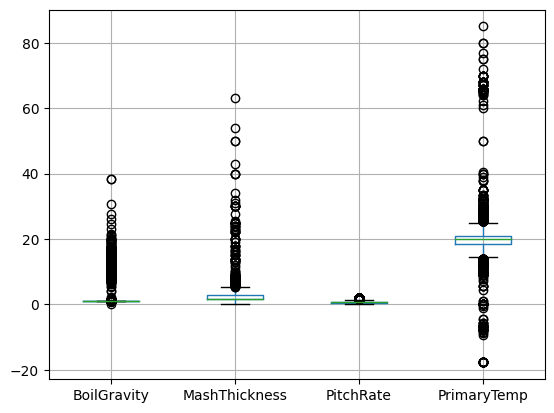

In [28]:
df_resolution.boxplot(["BoilGravity", "MashThickness", "PitchRate", "PrimaryTemp"])
plt.show()

In the case of the **PitchRate** we do not have so much outlier, but the other, the other are made basically of outlier 

Lets analyse a histogram

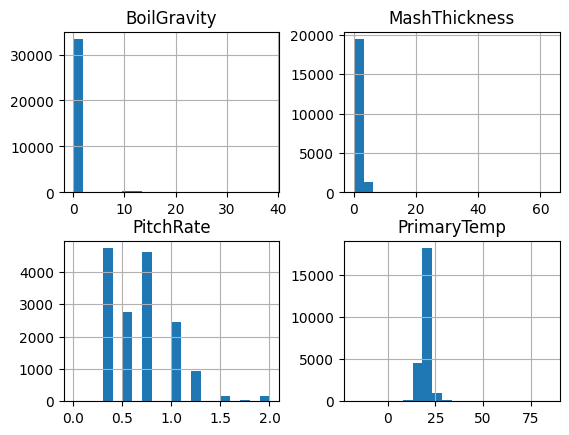

In [29]:
df_resolution.hist(["BoilGravity", "MashThickness", "PitchRate", "PrimaryTemp"], bins=20)
plt.show()

At the end of the day, I think the we can replace the **PitchRate** and **PrimaryTemp** missing values by the mean, on the other case it is better to use the median

In [30]:
df_resolution["PitchRate"].fillna(df_resolution['PitchRate'].mean(), inplace=True)

In [31]:
df_resolution["PrimaryTemp"].fillna(df_resolution['PrimaryTemp'].mean(), inplace=True)

In [32]:
df_resolution["MashThickness"].fillna(df_resolution['MashThickness'].median(), inplace=True)

In [33]:
df_resolution["PrimaryTemp"].fillna(df_resolution['PrimaryTemp'].median(), inplace=True)

In [34]:
df_resolution.isna().sum()/len(df_resolution)*100

StyleID          0.000000
Size(L)          0.000000
OG               0.000000
FG               0.000000
ABV              0.000000
IBU              0.000000
Color            0.000000
BoilSize         0.000000
BoilTime         0.000000
BoilGravity      3.669932
Efficiency       0.000000
MashThickness    0.000000
SugarScale       0.000000
PitchRate        0.000000
PrimaryTemp      0.000000
All Grain        0.000000
BIAB             0.000000
Partial Mash     0.000000
extract          0.000000
dtype: float64

Since the **BoilGravity** missing values is really small, we can deleted

In [39]:
df_resolution.dropna(inplace=True)

In [40]:
df_resolution.isna().sum()/len(df_resolution)*100

StyleID          0.0
Size(L)          0.0
OG               0.0
FG               0.0
ABV              0.0
IBU              0.0
Color            0.0
BoilSize         0.0
BoilTime         0.0
BoilGravity      0.0
Efficiency       0.0
MashThickness    0.0
SugarScale       0.0
PitchRate        0.0
PrimaryTemp      0.0
All Grain        0.0
BIAB             0.0
Partial Mash     0.0
extract          0.0
dtype: float64

Doing the machine learning itself

In [43]:
y = df_resolution["StyleID"]
x = df_resolution.drop(["StyleID"], axis=1)

In [46]:
norm = MinMaxScaler(feature_range = (0,1))

NameError: name 'MinMaxScaler' is not defined

In [65]:
def models(x, y):
    norm = MinMaxScaler(feature_range = (0,1))
    x_norm = norm.fit_transform(x)
    
    logist = LogisticRegression()
    naive = GaussianNB()
    decision_tree = DecisionTreeClassifier()
    Knn = KNeighborsClassifier()
    
    result_logist = cross_val_score(logist, x, y, cv = skfold)
    result_naive = cross_val_score(naive, x, y, cv = skfold)
    result_decision_tree = cross_val_score(decision_tree, x, y, cv = skfold)
    result_Knn = cross_val_score(Knn, x_norm, y, cv = skfold)
    
    dic_classmodels = {"Logistic": result_logist, "naive": result_naive, "decision tree": result_decision_tree, "knn": result_Knn}
    
    print("Logistic Regression:", result_logist.mean(), "Naive Bayes:", result_naive.mean(), "Decision Tree:", result_decision_tree.mean())

In [66]:
models(x,y)

/home/mack/.asdf/installs/python/3.10.7/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mack/.asdf/installs/python/3.10.7/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression: 0.4448317637813535 Naive Bayes: 0.4261930742176932 Decision Tree: 0.47941246795408576
